# **Data Cleaning**

## `Setup Init`

In [94]:
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro 
import phik

import warnings
warnings.filterwarnings("ignore")

## `Load Dataset` 

In [95]:
df = pd.read_csv('NYC TLC Trip Record.csv')

#### **1. Cek format, tipe, dan unique value pada dataset**

In [96]:
print(f'Jumlah baris dan kolom: {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    '%null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (68211, 20)


,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,VendorID,int64,0.000000,0.000000,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000000,0.000000,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-0..."
2,lpep_dropoff_datetime,object,0.000000,0.000000,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-0..."
3,store_and_fwd_flag,object,6.339154,6.339154,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339154,6.339154,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000000,0.000000,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43..."
6,DOLocationID,int64,0.000000,0.000000,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41,..."
7,passenger_count,float64,6.339154,6.339154,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0, nan]"
8,trip_distance,float64,0.000000,0.000000,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.5..."
9,fare_amount,float64,0.000000,0.000000,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 47.1, 60.0, 7.9, 10.0, 3.0, 5.5, 17.0, 75.0, 15.6, 47.8, ..."


<br>Berikut **Data Dictionary** beserta pembagian **Data Type** attribute dari dataset yang berisi rekam perjalanan **Green Taxi** yang dipublikasikan oleh **New York City (NYC) Taxi & Limousine Commission (TLC)** (referensi: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf dan https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)
* Tipe data: **Numerical**, **Discrete**
    * **`VendorID`**: Nomor ID dari provider teknologi yang menyediakan rekam data perjalanan
    * **`RatecodeID`**: Jenis tarif dasar berdasarkan rute perjalanan, bergantung pada lokasi tujuan/drop-off
    * **`PULocationID`**: Nomor ID dari lokasi pick-up
    * **`DOLocationID`**: Nomor ID dari lokasi drop-off
    * **`passenger_count`**: Jumlah penumpang, merupakan nilai yang dimasukkan oleh driver
    * **`extra`**: Tarif tambahan lain-lain seperti tarif rush hour atau overnight
    * **`mta_tax`**: Tarif pajak
    * **`tolls_amount`**: Tarif tambahan ketika melalui jalan tol
    * **`ehail_fee`**: Keterangan atribut tidak tersedia pada referensi, tetapi diasumsikan sebagai tarif tambahan ketika taxi dipesan melalui aplikasi
    * **`improvement_surcharge`**: Tarif tambahan untuk perbaikan/maintenance layanan
    * **`congestion_surcharge`**: Tarif tambahan ketika ada kemacetan
    * **`payment_type`**: Cara pembayaran
    * **`trip_type`**: Jenis perjalanan berupa street-hail (dipesan langsung di jalan) dan dispatch (dipesan melalui panggilan ke pangkalan)
* Tipe data: **Numerical**, **Continuous**
    * **`trip_distance`**: Jarak tempuh perjalanan dalam mil
    * **`fare_amount`**: Tarif perjalanan berdasarkan jarak tempuh dan durasi perjalanan
    * **`tip_amount`**: Tip yang dibayarkan secara credit card
    * **`total_amount`**: Total yang dibayar penumpang di luar tip secara cash
* Tipe data: **Datetime**
    * **`lpep_pickup_datetime`**: Waktu pickup ketika taximeter mulai dijalankan, format YYYY-MM-DD HH:MM:SS
    * **`lpep_dropoff_datetime`**: Waktu drop-off ketika taximeter dihentikan, format YYYY-MM-DD HH:MM:SS
* Tipe data: **Categorical**, **Nominal**
    * **`store_and_fwd_flag`**: Keterangan jika driver terhubung ke server saat perjalanan (Y) atau tidak (N). Jika tidak, rekaman data diupdate ke server kemudian

Untuk memudahkan pengolahan data, beberapa nama dan susunan kolom diubah.

In [97]:
# mengganti nama kolom
df.rename(columns={
    'lpep_pickup_datetime': 'pickup_datetime',
    'lpep_dropoff_datetime': 'dropoff_datetime',
}, inplace=True)

# mengubah susunan kolom
df = df[['VendorID', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'congestion_surcharge', 'total_amount', 'payment_type', 'trip_type']]


* Terdapat proses encoding (mengubah data kategorikal menjadi numerik) pada data di kolom VendorID, RatecodeID, PULocationID, DOLocationID, passenger_count, payment_type, trip_type.

Untuk memudahkan pengolahan data, akan dilakukan perubahan format tipe data pada python untuk beberapa kolom yaitu:
* Kolom pickup_datetime, dropoff_datetime berupa **object** seharusnya **datetime64[s]**
* Kolom VendorID, RatecodeID, PULocationID, DOLocationID, passenger_count, payment_type, trip_type diubah menjadi **object**

In [98]:
df = df.astype({
    'pickup_datetime': 'datetime64[s]',
    'dropoff_datetime': 'datetime64[s]',
    'VendorID': 'object',
    'RatecodeID': 'object',
    'PULocationID': 'object',
    'DOLocationID': 'object',
    'passenger_count': 'object',
    'payment_type': 'object',
    'trip_type': 'object'
})

#### **2. Penambahan feature yang dibutuhkan dalam analisis (I)**

Feature lain yang akan dibutuhkan dalam analisis:
* Durasi perjalanan dalam detik (`trip_duration_seconds`)

Pembuatan kolom **durasi perjalanan** dalam detik (**`trip_duration_seconds`**) bertujuan untuk mendeteksi outlier durasi perjalanan. Durasi perjalanan didapatkan dari selisih waktu drop-off dan pickup.


In [99]:
#menambahkan feature trip_duration_seconds dan menyesuaikan posisi kolomnya
df.insert(loc=3, column='trip_duration_seconds', value=(df.dropoff_datetime - df.pickup_datetime).apply(lambda x: x.total_seconds()).astype('int64'))
df.head()

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,661,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,2.75,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,406,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,0.00,15.84,1.0,1.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,380,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,0.00,11.64,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,349,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,0.00,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,358,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,0.00,8.00,1.0,1.0


#### **3. Handling Data Anomali pada kolom passenger_count, mta_tax, congestion_surcharge, dan RatecodeID**

In [100]:
#Maksimal kapasitas penumpang taksi sebanyak 6 orang (menurut referensi) dan minimalnya 1 orang
df.passenger_count = np.where(df.passenger_count > 6, 6, np.where(df.passenger_count == 0, 1, df.passenger_count))
#mta_tax, menurut referensi merupakan kelipatan 0.5$ sementara di data ada yang bernilai $2.75, ubah menjadi 0
df.mta_tax.replace({2.75:0}, inplace=True)
#congestion_surcharge, tarif tambahan untuk green taxi jika terjadi kemacetan adalah $2.75 bukan $2.5
df.congestion_surcharge.replace({2.5:2.75}, inplace=True)
#Drop baris dengan RatecodeID yang bernilai 99 karena penjelasan nilai 99 tidak ada di referensi dan juga jumlah datanya sedikit
df = df[~(df.RatecodeID == 99)]

#### **4. Handling Data Duplikat**

In [101]:
df.drop_duplicates(subset=['pickup_datetime', 'dropoff_datetime'], keep='last', inplace=True)
# df.drop_duplicates(subset=['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID'], keep='last', inplace=True)
print(f"n_data after removing duplicates: {len(df)}")

n_data after removing duplicates: 68016


#### **5. Handling Nilai Negatif**

In [102]:
# melakukan absolut nilai negatif pada kolom-kolom tarif
df.loc[:,'fare_amount':'congestion_surcharge'] = df.loc[:,'fare_amount':'congestion_surcharge'].apply(abs)

#### **6. Handling Kolom yang tidak dibutuhkan**

In [103]:

# drop kolom yang tidak akan digunakan dalam analisis
df.drop(columns=['store_and_fwd_flag'], inplace=True)
#data pada kolom ehail_fee kosong (nilainya tidak ada), bisa kita asumsikan bahwa tidak ada pemesanan melalui aplikasi 
#yang secara otomatis akan menambahkan nilai pada kolom ehail_fee sehingga kolom ini dapat didrop.
df.drop(columns=['ehail_fee'], inplace=True)

#### **7. Handling Periode Trip**

In [104]:
# mengambil sejumlah data yang akan diolah yaitu mulai dari tanggal pickup 1 Januari-31 Januari 2023
df = df[(df.pickup_datetime.apply(lambda x: x.year) == 2023) & (df.pickup_datetime.apply(lambda x: x.month) == 1)]

#### **8. Penambahan feature yang dibutuhkan dalam analisis dari suatu referensi**

Penambahan feature yang dibutuhkan dalam analisis dari suatu referensi dibutuhkan karena keterangan lokasi pickup dan drop-off hanya berupa ID, perlu dihubungkan dengan data tambahan yang menjelaskan nama zone dan borough dari lokasi tersebut (tersedia di https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv)

In [105]:
df_zone = pd.read_csv('taxizone.csv')
print(f'Jumlah baris dan kolom: {df_zone.shape}')

pd.DataFrame(
    {
    'feature': df_zone.columns.values,
    'data_type': df_zone.dtypes.values,
    'null_value': df_zone.isna().mean().values * 100,
    '%null_value': df_zone.isna().mean().values * 100,
    'n_unique': df_zone.nunique().values,
    'sample_unique': [df_zone[col].unique() for col in df_zone.columns]
    }
)
display(df_zone.isna().sum(), df_zone[df_zone.service_zone.isna().values])


Jumlah baris dan kolom: (265, 4)


LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [106]:
#Dari data taxi zone lookup, terdapat dua LocationID yang tidak diketahui nama wilayahnya yaitu ID 264 dan 265.
df[(df.PULocationID.isin([264,265])) | (df.DOLocationID.isin([264,265]))]


,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,trip_type
31,2,2023-01-01 00:46:48,2023-01-01 01:08:17,1289,4.0,95,265,1.0,10.44,47.10,1.0,0.5,9.92,0.00,1.0,0.0,59.52,1.0,1.0
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,2,1.0,264,264,1.0,0.00,3.00,1.0,0.5,21.50,0.00,0.3,0.0,26.30,1.0,1.0
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,3,5.0,260,264,1.0,0.00,20.00,0.0,0.0,4.20,0.00,1.0,0.0,25.20,1.0,2.0
186,2,2023-01-01 03:01:54,2023-01-01 03:01:56,2,5.0,129,264,1.0,0.00,12.00,0.0,0.0,0.00,0.00,1.0,0.0,13.00,1.0,2.0
227,2,2023-01-01 03:11:48,2023-01-01 03:12:31,43,5.0,7,264,1.0,0.00,12.00,0.0,0.0,2.60,0.00,1.0,0.0,15.60,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67311,2,2023-01-25 11:26:00,2023-01-25 11:35:00,540,NaN,240,265,NaN,3.87,26.03,0.0,0.0,3.00,0.00,1.0,NaN,30.03,NaN,NaN
67733,2,2023-01-28 07:39:00,2023-01-28 08:30:00,3060,NaN,89,265,NaN,21.87,97.24,0.0,0.0,23.51,19.30,1.0,NaN,141.05,NaN,NaN
67792,2,2023-01-28 16:45:00,2023-01-28 17:39:00,3240,NaN,49,265,NaN,7.74,36.40,0.0,0.0,7.82,14.75,1.0,NaN,59.97,NaN,NaN
67940,2,2023-01-29 21:41:00,2023-01-29 22:13:00,1920,NaN,175,265,NaN,21.30,82.19,0.0,0.0,17.95,6.55,1.0,NaN,107.69,NaN,NaN


In [107]:
#Pada data green taxi, terdapat 704 poin data yang mempunyai titik pickup atau drop-off di lokasi ID 264 atau 265. 
#Data ini selanjutnya tidak akan digunakan dalam analisis karena tidak dapat memberikan informasi lokasi.

# menghilangkan data yang memiliki nilai PULocationID 264 atau 265 serta nilai DOLocationID 264 atau 265
df = df[(~df.PULocationID.isin([264,265])) & (~df.DOLocationID.isin([264,265]))]


In [108]:
#Menambahkan kolom dari data df_zone
df = df.merge(df_zone.set_index('LocationID'), how='left', left_on='PULocationID', right_index=True)
df.rename(columns={'Borough': 'PU_Borough',
                    'Zone': 'PU_Zone',
                    'service_zone': 'PU_service_zone'}, inplace=True)

df = df.merge(df_zone.set_index('LocationID'), how='left', left_on='DOLocationID', right_index=True)
df.rename(columns={'Borough': 'DO_Borough',
                    'Zone': 'DO_Zone',
                    'service_zone': 'DO_service_zone'}, inplace=True)

df = df.assign(
    trip_zone = df['PU_Zone'] + ' - ' + df['DO_Zone'],
    trip_borough = df['PU_Borough'] + ' - ' + df['DO_Borough'],
    trip_service_zone = df['PU_service_zone'] + ' - ' + df['DO_service_zone']
)
df

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,661,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,2.75,24.18,1.0,1.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Morningside Heights - Lincoln Square West,Manhattan - Manhattan,Boro Zone - Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,406,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,0.00,15.84,1.0,1.0,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,Bloomingdale - Central Park,Manhattan - Manhattan,Yellow Zone - Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,380,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,0.00,11.64,1.0,1.0,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,Steinway - Old Astoria,Queens - Queens,Boro Zone - Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,349,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,0.00,10.20,1.0,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,Central Harlem - Upper West Side North,Manhattan - Manhattan,Boro Zone - Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,358,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,0.00,8.00,1.0,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,Central Harlem - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,780,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,NaN,16.70,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone,Clinton Hill - Crown Heights South,Brooklyn - Brooklyn,Boro Zone - Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,480,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,NaN,5.41,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone,Baisley Park - Saint Albans,Queens - Queens,Boro Zone - Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,960,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,NaN,21.04,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone,DUMBO/Vinegar Hill - Bushwick South,Brooklyn - Brooklyn,Boro Zone - Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1080,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,NaN,19.18,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone,Stuyvesant Heights - Prospect Heights,Brooklyn - Brooklyn,Boro Zone - Boro Zone


#### **9. Handling Missing Value**

<Axes: >

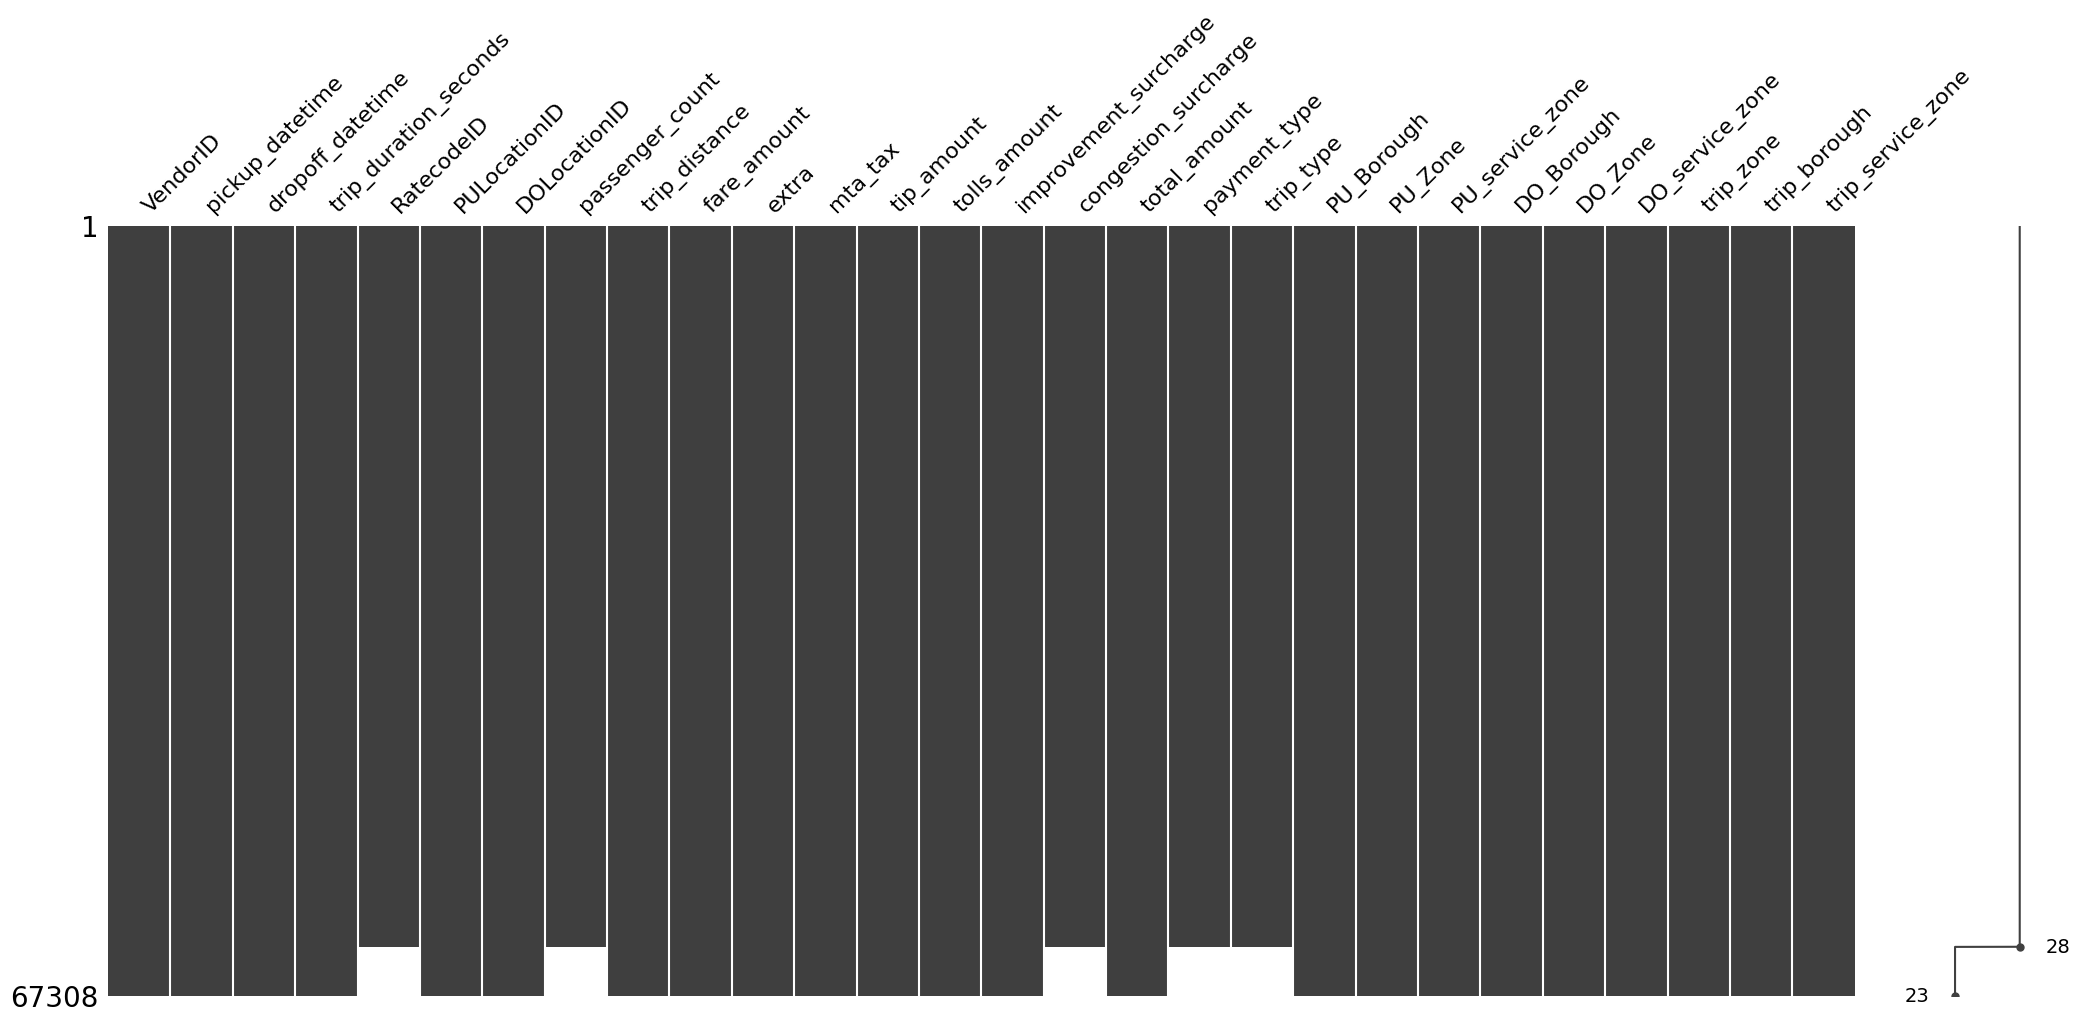

In [109]:
msno.matrix(df)

In [110]:
df.isna().sum()
#Perlu diperhatikan bahwa lima kolom yang memiliki missing values mempunyai tipe data numerical, discrete.

VendorID                    0
pickup_datetime             0
dropoff_datetime            0
trip_duration_seconds       0
RatecodeID               4294
PULocationID                0
DOLocationID                0
passenger_count          4294
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4294
total_amount                0
payment_type             4294
trip_type                4294
PU_Borough                  0
PU_Zone                     0
PU_service_zone             0
DO_Borough                  0
DO_Zone                     0
DO_service_zone             0
trip_zone                   0
trip_borough                0
trip_service_zone           0
dtype: int64

<Axes: >

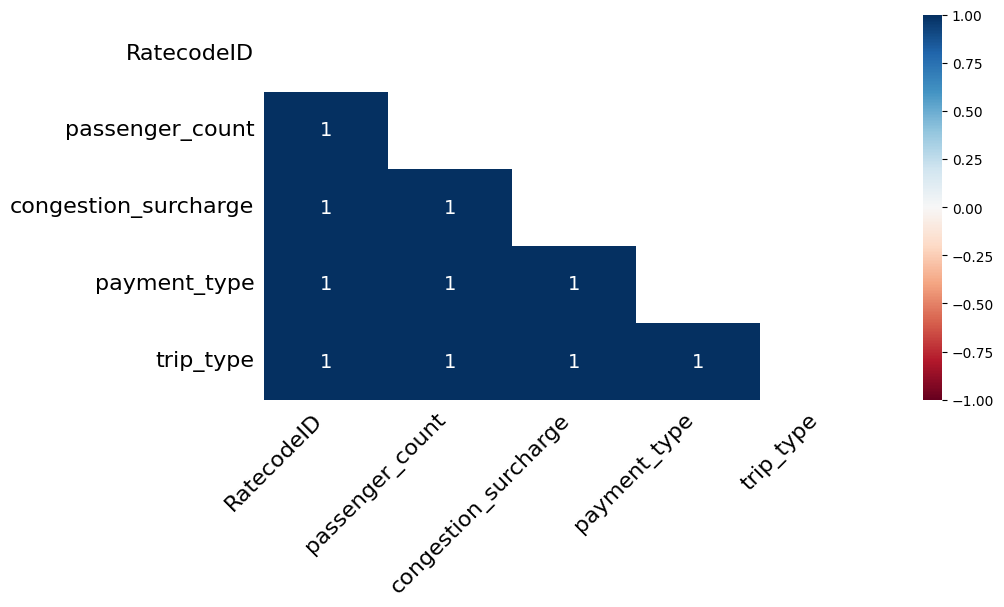

In [111]:
# Menampilkan heatmap missing value untuk mengecek apakah MCAR atau MAR, hanya kolom yang ada MV aja
#ngecek MCAR antar kolom yang punya MV, cek juga dengan kolom yang ga punya MV, pengalaman domain juga yak dipertimbangin!
msno.heatmap(df, figsize=(10, 5))

#mendekati nilai 1 ada korelasi berbanding lurus, baris data yang memiliki MV di suatu kolom bersesuaian dengan adanya MV dari kolom lain 
#Jenis MV nya MAR

Missing values pada kolom RatecodeID, passenger_count, congestion_surcharge, payment_type, dan trip_type bersifat **Missing At Random (MAR)**. Selanjutnya, handling missing values untuk kolom ini akan mengikuti handling missing values untuk data MAR.

### 9.1 RatecodeID

In [112]:

df.RatecodeID = np.where(df.RatecodeID == 5, df.RatecodeID,\
    np.where(((df.PU_Borough == 'Manhattan') & (df.DO_Zone == 'JFK Airport')) | ((df.PU_Zone == 'JFK Airport') & (df.DO_Borough == 'Manhattan')), 2,\
    np.where(df.DO_Zone == 'Newark Airport', 3, 1)))
df.RatecodeID.value_counts()



RatecodeID
1      65869
5.0     1264
2        157
3         18
Name: count, dtype: int64

### 9.2 Passenger count

In [113]:
# memisahkan data dengan dan tanpa missing values
df_na = df[df.passenger_count.isna().values].copy()
df_notna = df[~(df.passenger_count.isna().values)].copy()
#Imputasi untuk missing values jumlah penumpang dilakukan dengan menggunakan jumlah minimal penumpang taksi, yaitu 1.
df_na.passenger_count.fillna(1, inplace=True)


### 9.3 Congestion Surcharge

interval columns not set, guessing: ['fare_amount', 'congestion_surcharge']
interval columns not set, guessing: ['fare_amount', 'congestion_surcharge']


Text(0.5, 1.0, 'significance')

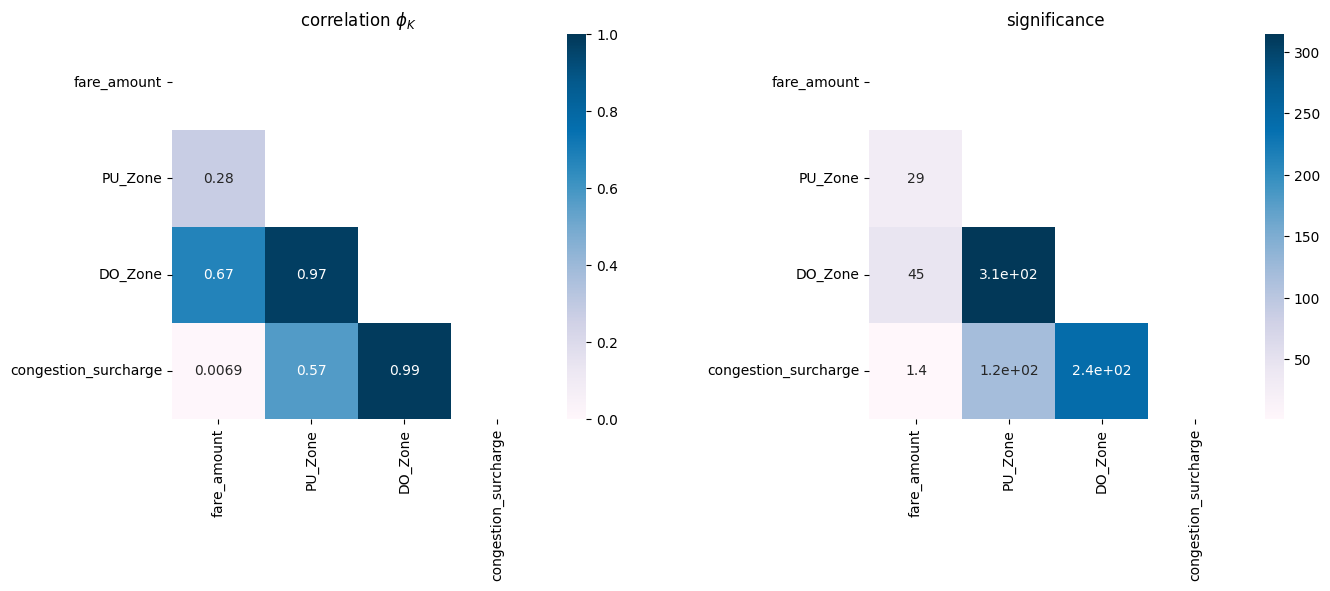

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

cols = ['fare_amount', 'PU_Zone','DO_Zone', 'congestion_surcharge']

corr = df_notna[cols].phik_matrix()
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="PuBu", ax=ax[0])

sig = df_notna[cols].significance_matrix()
sig_mask = np.triu(np.ones_like(sig, dtype=bool))
sns.heatmap(sig, mask=sig_mask, annot=True, cmap="PuBu", ax=ax[1])

ax[0].set_title(r'correlation $\phi_K$')
ax[1].set_title(r'significance')


<br>Congestion surcharge terlihat memiliki korelasi phik dengan beberapa atribut lain yaitu: fare_amount, PU_Zone, dan DO_Zone. Korelasi phik tertinggi adalah antara congestion surcharge dan zona drop-off, didukung dengan nilai signifikansi yang juga cukup tinggi.

Congestion surcharge akan diimputasi menggunakan peluang bersyarat terhadap zona drop-off.

In [115]:
# membuat cross-tabulasi zona drop-off dan congestion surcharge
congestion_ct = pd.crosstab(df_notna.DO_Zone, df_notna.congestion_surcharge, margins=True)
# mengurutkan frekuensi congestion surcharge dari nilai tertinggi
congestion_ct.sort_values(by=2.75, ascending=False)

congestion_surcharge,0.0,2.75,All
DO_Zone,,,
All,46138,16876,63014
Upper East Side North,162,2491,2653
Upper West Side North,821,1417,2238
Yorkville West,101,1410,1511
Upper West Side South,5,1398,1403
...,...,...,...
Homecrest,49,0,49
Howard Beach,28,0,28
Hunts Point,22,0,22


Peluang kemungkinan terjadinya congestion jika diketahui zona drop off (P(congestion | DO_Zone))
<br>**P(congestion | DO_Zone) = P(congestion ∩ DO_Zone) / P(DO_Zone)**

In [116]:
p_congestion = (congestion_ct.iloc[:-1,1] / congestion_ct.iloc[-1,-1]) / (congestion_ct.iloc[:-1,2] / congestion_ct.iloc[-1,-1])
p_congestion.name = 'p_congestion'
p_congestion

DO_Zone
Allerton/Pelham Gardens    0.000000
Alphabet City              0.967213
Astoria                    0.008182
Astoria Park               0.000000
Auburndale                 0.000000
                             ...   
Woodlawn/Wakefield         0.000000
Woodside                   0.003656
World Trade Center         0.894737
Yorkville East             0.994145
Yorkville West             0.933157
Name: p_congestion, Length: 245, dtype: float64

Hasil perhitungan peluang bersyarat terjadinya kemacetan jika diketahui zona drop-off lalu digabungkan dengan data missing values. Congestion surcharge akan dianggap ada ketika peluang lebih dari 0.5.

In [117]:
import math
# menggabungkan peluang bersyarat dengan data missing values
df_na = df_na.merge(p_congestion, how='left', left_on='DO_Zone', right_index=True)
# mengubah float nan menjadi np.nan
df_na.p_congestion = df_na.p_congestion.apply(lambda x: np.nan if math.isnan(x) else x)
# thresholding peluang > 0.5 dinyatakan macet (atau congestion surcharge ada nilainya, $2.75)
df_na.congestion_surcharge = np.where(df_na.p_congestion.isna().values, np.nan, np.where(df_na.p_congestion > 0.5, 2.75, 0))
# drop kolom p_congestion
df_na.drop(columns='p_congestion', inplace=True)

In [118]:
df_na.dropna(subset='congestion_surcharge', inplace=True)

### 9.4 Payment Type

Imputasi missing value untuk Payment_type akan dikategorikan jenis pembayaran yang tidak diketahui (5: unknown). 

In [119]:
df_na.payment_type.fillna(5, inplace=True)

### 9.5 Trip Type

Imputasi missing values untuk kolom trip_type akan dikategorikan sebagai trip_type baru yaitu 3: others.

In [120]:
df_na.trip_type.fillna(3, inplace=True)

<Axes: >

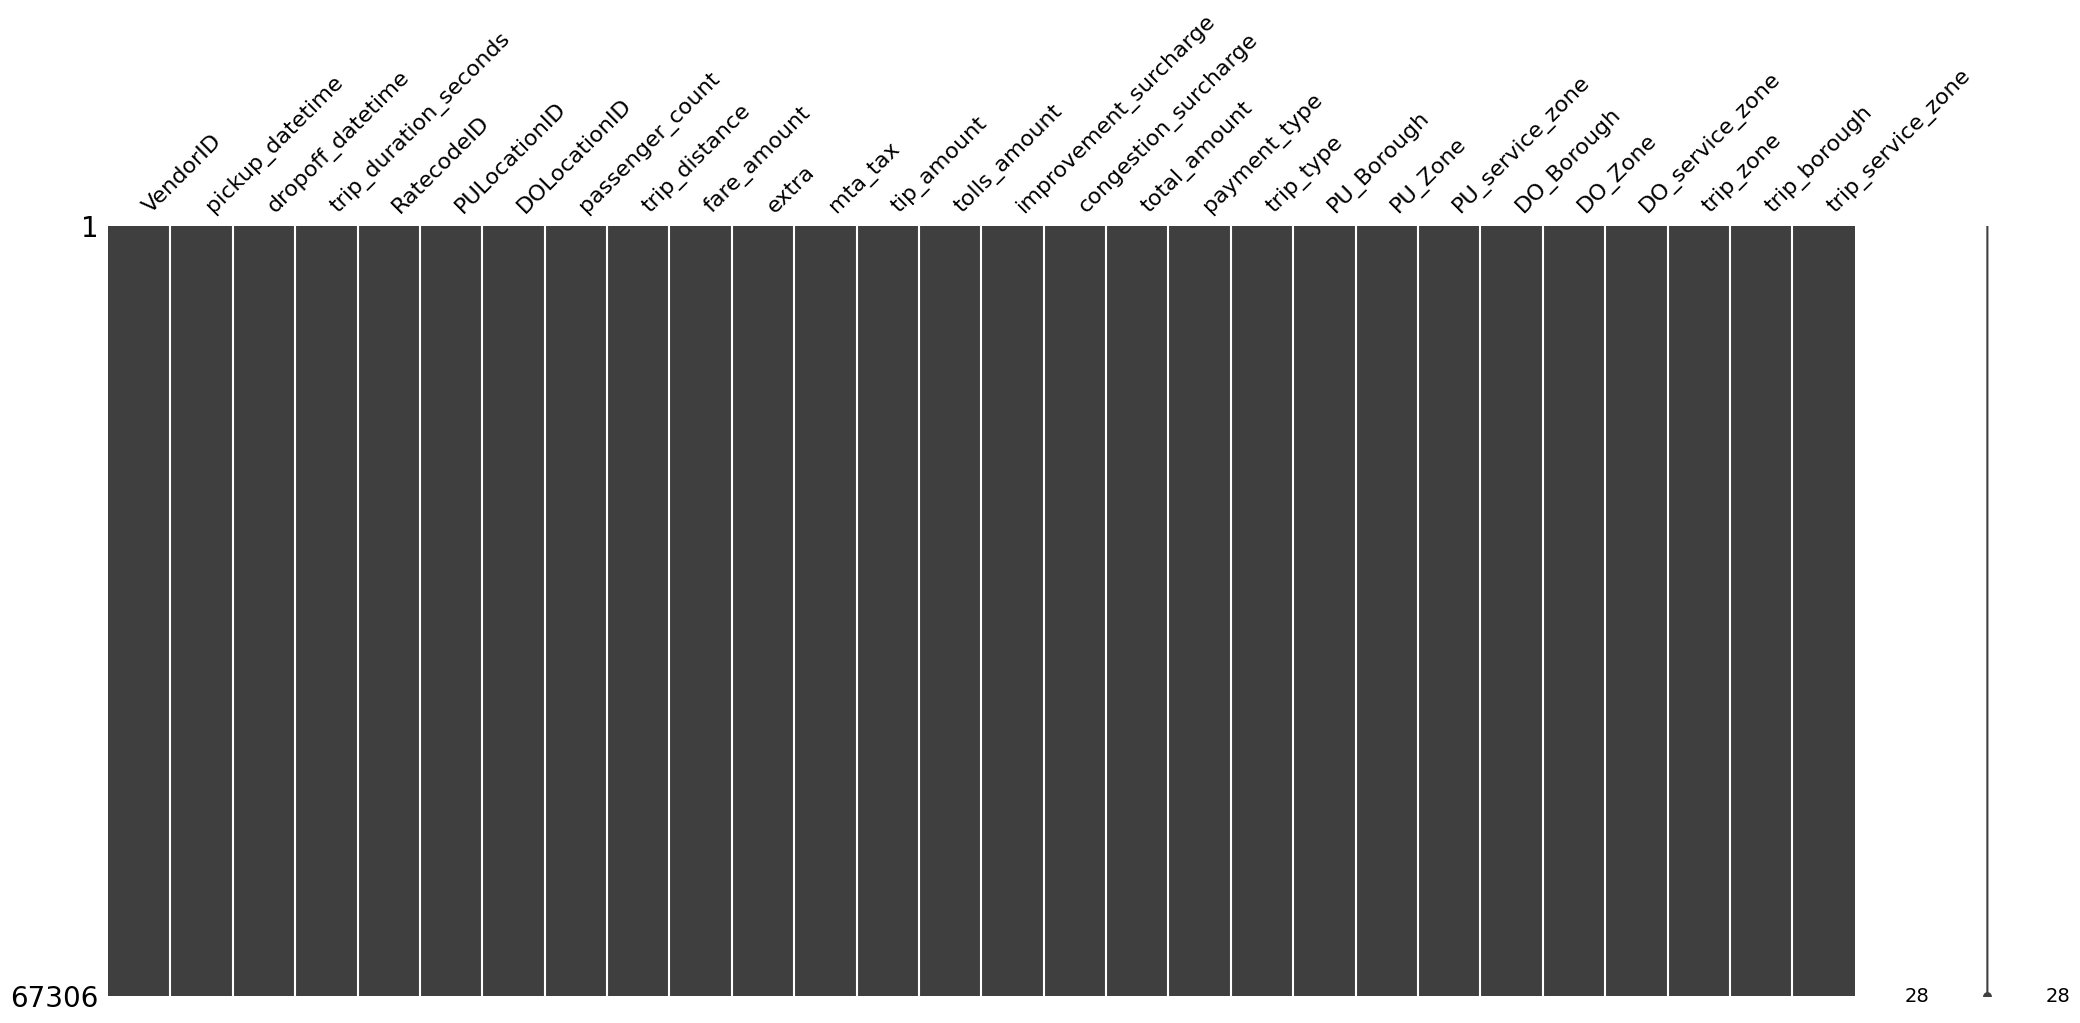

In [121]:
df = pd.concat([df_notna, df_na], axis=0).sort_index(ascending=True)
msno.matrix(df)

#### **10. Handling Outlier**

In [122]:
print(f'Jumlah baris dan kolom: {df.shape}')

pd.DataFrame(
    {
    'attribute': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    '%null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)


Jumlah baris dan kolom: (67306, 28)


,attribute,data_type,null_value,%null_value,n_unique,sample_unique
0,VendorID,object,0.0,0.0,2,"[2, 1]"
1,pickup_datetime,datetime64[s],0.0,0.0,65888,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-0..."
2,dropoff_datetime,datetime64[s],0.0,0.0,65824,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-0..."
3,trip_duration_seconds,int64,0.0,0.0,3598,"[661, 406, 380, 349, 358, 1053, 1045, 777, 297, 1390, 1531, 505, 1139, 694, 2314, 1129, 532, 2544, 677, 433, 245, 250, 563, 274, 871, 1013, 723, 1108, 481, 597, 484, 1414, 249, 507, 5, 1095, 598, ..."
4,RatecodeID,object,0.0,0.0,4,"[1, 5.0, 2, 3]"
5,PULocationID,object,0.0,0.0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 33, 226, 52, 169, 36, 157, 43, 256, 17..."
6,DOLocationID,object,0.0,0.0,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168,..."
7,passenger_count,object,0.0,0.0,6,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
8,trip_distance,float64,0.0,0.0,1799,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74..."
9,fare_amount,float64,0.0,0.0,2474,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 3.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, ..."


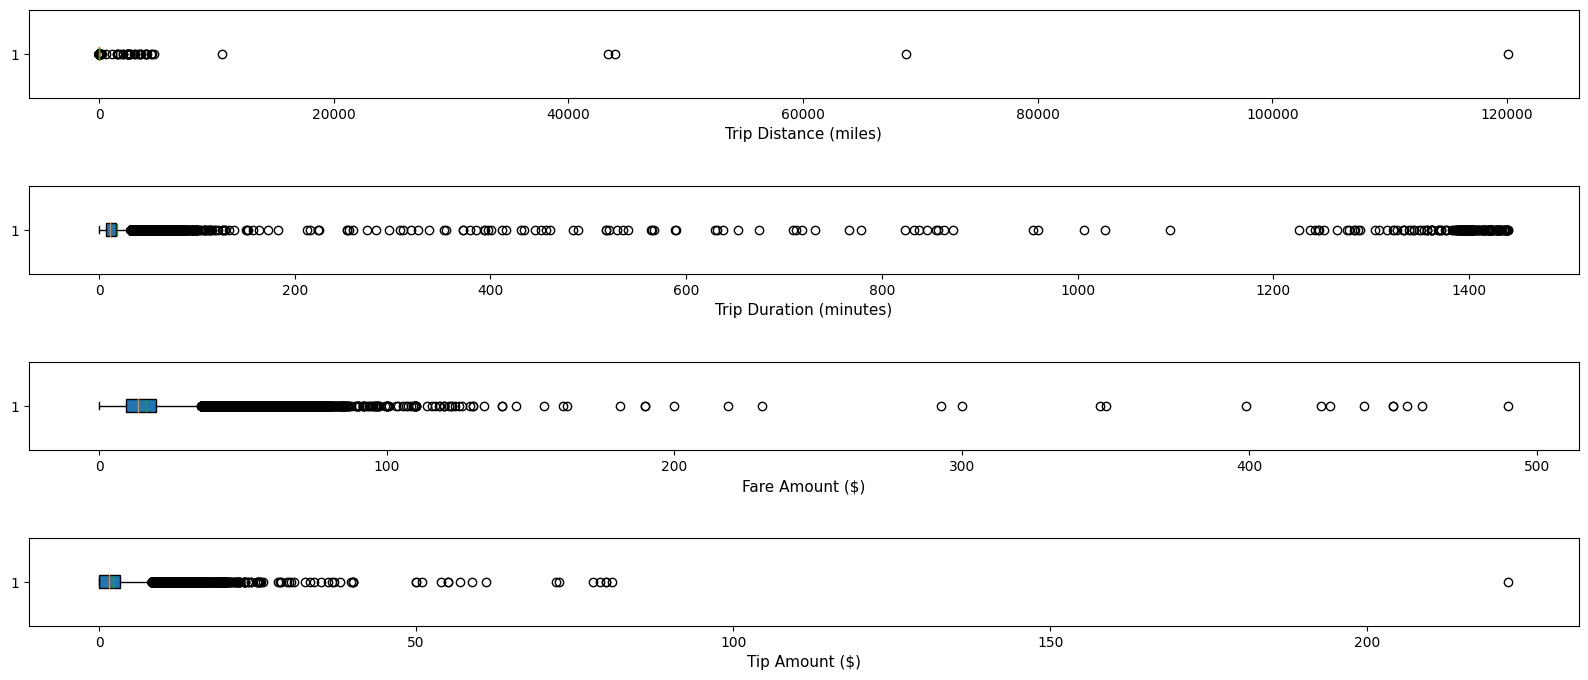

In [123]:
fig, axes = plt.subplots(4, 1, figsize=(20, 8))
axes[0].boxplot(df.trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(df.trip_duration_seconds.apply(lambda x: x/60), patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[2].boxplot(df.fare_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[3].boxplot(df.tip_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Trip Distance (miles)", fontsize=11)
axes[1].set_xlabel("Trip Duration (minutes)", fontsize=11)
axes[2].set_xlabel("Fare Amount ($)", fontsize=11)
axes[3].set_xlabel("Tip Amount ($)", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

In [124]:
df.fare_amount = np.where(((df.trip_duration_seconds <= 60) | (df.trip_distance <= 0.2)) & ((df.RatecodeID == 1) & (df.fare_amount != 3)), 3,\
                           np.where(((df.trip_duration_seconds <= 60) | (df.trip_distance <= 0.2)) & ((df.RatecodeID == 2) & (df.fare_amount != 70)), 70,\
                                     np.where(((df.trip_duration_seconds <= 60) | (df.trip_distance <= 0.2)) & ((df.RatecodeID == 3) & (df.fare_amount != 23)), 23, df.fare_amount)))
df

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,661,1,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,2.75,24.18,1.0,1.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Morningside Heights - Lincoln Square West,Manhattan - Manhattan,Boro Zone - Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,406,1,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,0.00,15.84,1.0,1.0,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,Bloomingdale - Central Park,Manhattan - Manhattan,Yellow Zone - Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,380,1,223,179,1.0,0.00,3.00,1.0,0.5,1.94,0.0,1.0,0.00,11.64,1.0,1.0,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,Steinway - Old Astoria,Queens - Queens,Boro Zone - Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,349,1,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,0.00,10.20,1.0,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,Central Harlem - Upper West Side North,Manhattan - Manhattan,Boro Zone - Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,358,1,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,0.00,8.00,1.0,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,Central Harlem - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,780,1,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,0.00,16.70,5,3,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone,Clinton Hill - Crown Heights South,Brooklyn - Brooklyn,Boro Zone - Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,480,1,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,0.00,5.41,5,3,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone,Baisley Park - Saint Albans,Queens - Queens,Boro Zone - Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,960,1,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,0.00,21.04,5,3,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone,DUMBO/Vinegar Hill - Bushwick South,Brooklyn - Brooklyn,Boro Zone - Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1080,1,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,0.00,19.18,5,3,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone,Stuyvesant Heights - Prospect Heights,Brooklyn - Brooklyn,Boro Zone - Boro Zone


''

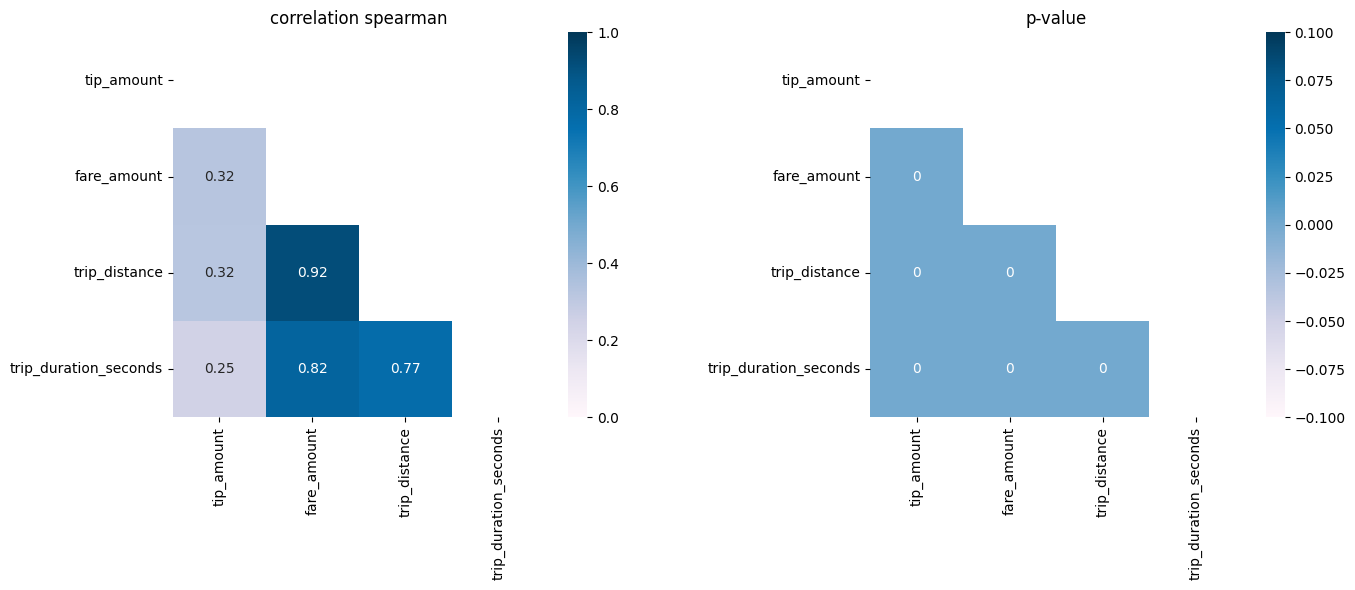

In [125]:
from scipy.stats import spearmanr
    
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

cols = ['tip_amount', 'fare_amount','trip_distance', 'trip_duration_seconds']

corr = df[cols].corr(method='spearman')
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="PuBu", ax=ax[0])

sig = df[cols].corr(method=spearmanr_pval)
sig_mask = np.triu(np.ones_like(sig, dtype=bool))
sns.heatmap(sig, mask=sig_mask, annot=True, cmap="PuBu", ax=ax[1])

ax[0].set_title(r'correlation spearman')
ax[1].set_title(r'p-value')
;

In [126]:
df_old = df.copy()

# longest distance between two arbitrary points in NYC & Google Maps
df.trip_distance = df.trip_distance.mask(df.trip_distance > 50)

# maksimal trip_speed untuk durasi lebih dari 2 jam adalah 11mph, kurang logis secara domain knowledge
df.trip_duration_seconds = df.trip_duration_seconds.mask(df.trip_duration_seconds > 2*3600)

# batas maksimal fare amount adalah maksimal tarif ke airport
df.fare_amount = df.fare_amount.mask(df.fare_amount > df[df.RatecodeID.isin([2,3])].fare_amount.max())

# batas maksimal tip adalah 2 kali fare_amount
df.tip_amount = df.tip_amount.mask((df.tip_amount > 2*df.fare_amount), 2*df.fare_amount)

In [127]:
len(df)

67306

In [128]:
idx_na = df[df.isna().values].index
idx_notna = df.index.difference(idx_na)
len(idx_na.unique()) + len(idx_notna)
df[df.isna().values].index

Index([   49,   104,   108,   118,   207,   262,   556,   556,   635,   739,
       ...
       66842, 67126, 67153, 67272, 67307, 67415, 67926, 67973, 68184, 68206],
      dtype='int64', length=326)

In [129]:
#Imputasi multivariat untuk mengatasi missing value di suatu kolom 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
cols = ['tip_amount', 'fare_amount','trip_distance', 'trip_duration_seconds']
df[cols] = imp.fit_transform(df[cols])

In [130]:
from scipy.stats import ks_2samp

stats, pvalue = ks_2samp(df_old.loc[idx_notna].trip_distance, df.trip_distance, alternative='two-sided')
print('p-value:', pvalue/2)

stats, pvalue = ks_2samp(df_old.loc[idx_notna].trip_duration_seconds, df.trip_duration_seconds, alternative='two-sided')
print('p-value:', pvalue/2)

stats, pvalue = ks_2samp(df_old.loc[idx_notna].fare_amount, df.fare_amount, alternative='two-sided')
print('p-value:', pvalue/2)

p-value: 0.5
p-value: 0.5
p-value: 0.5


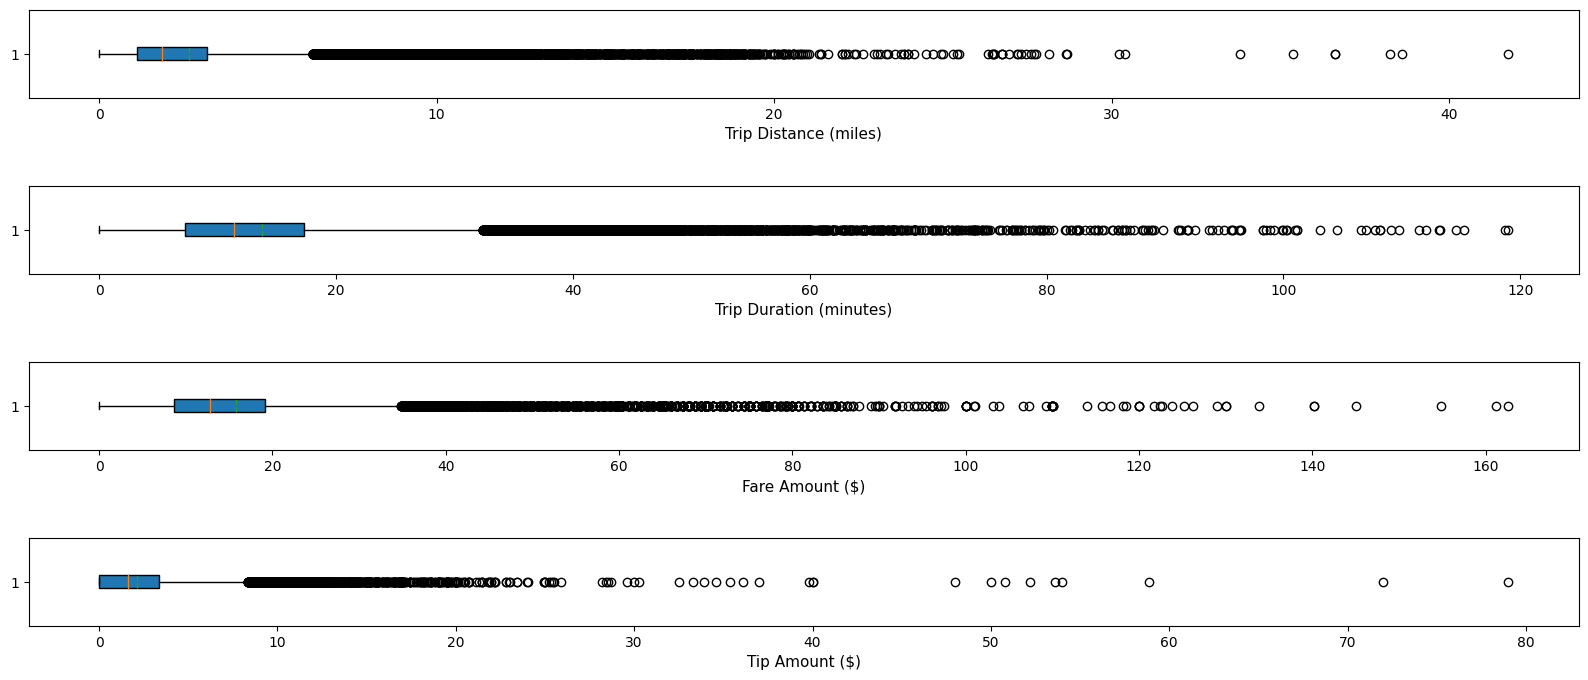

In [131]:
fig, axes = plt.subplots(4, 1, figsize=(20, 8))
axes[0].boxplot(df.trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(df.trip_duration_seconds.apply(lambda x: x/60), patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[2].boxplot(df.fare_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[3].boxplot(df.tip_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Trip Distance (miles)", fontsize=11)
axes[1].set_xlabel("Trip Duration (minutes)", fontsize=11)
axes[2].set_xlabel("Fare Amount ($)", fontsize=11)
axes[3].set_xlabel("Tip Amount ($)", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

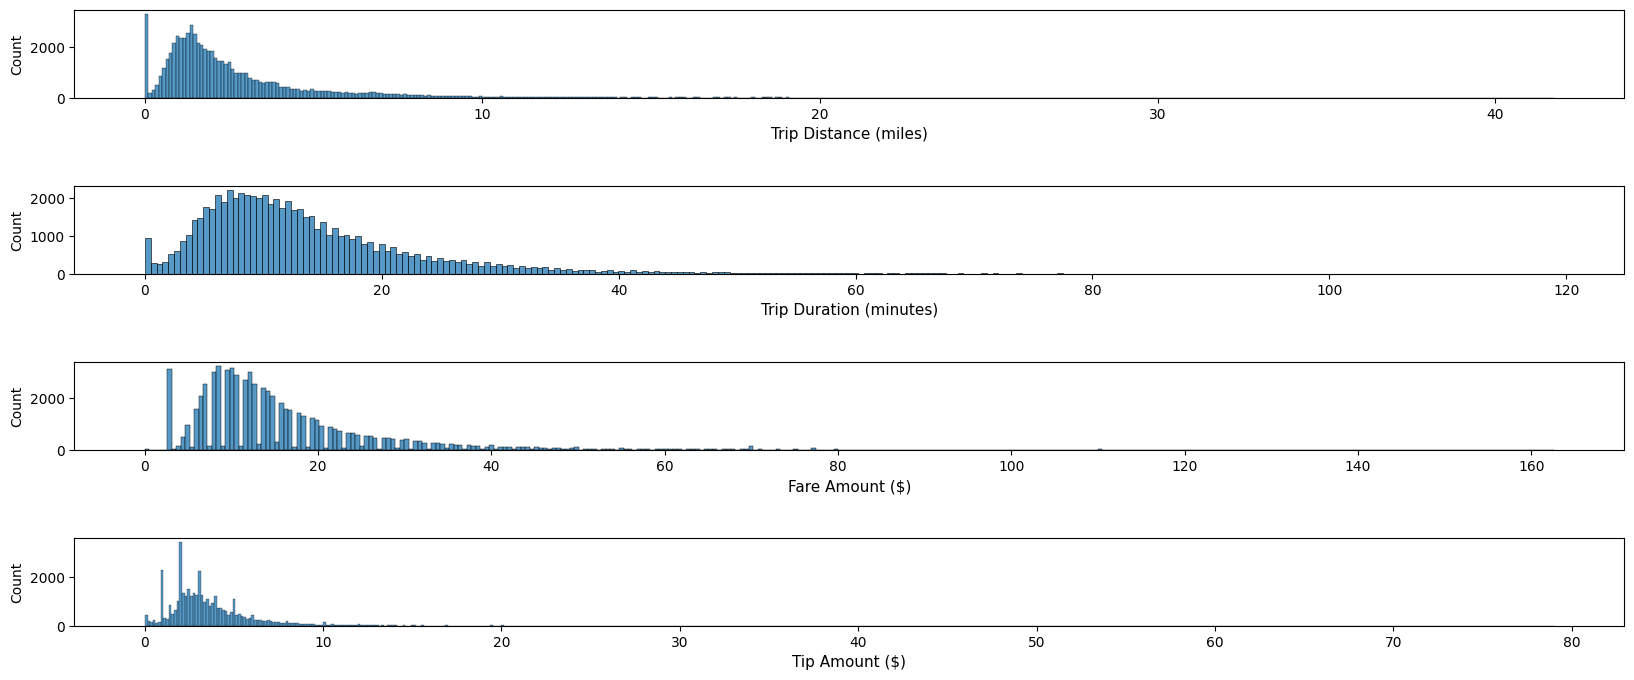

In [132]:
fig, axes = plt.subplots(4, 1, figsize=(20, 8))
sns.histplot(df.trip_distance, ax=axes[0])
sns.histplot(df.trip_duration_seconds.apply(lambda x: x/60), ax=axes[1])
sns.histplot(df.fare_amount, ax=axes[2])
sns.histplot(df[df.tip_amount > 0].tip_amount, ax=axes[3])

axes[0].set_xlabel("Trip Distance (miles)", fontsize=11)
axes[1].set_xlabel("Trip Duration (minutes)", fontsize=11)
axes[2].set_xlabel("Fare Amount ($)", fontsize=11)
axes[3].set_xlabel("Tip Amount ($)", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

#### **11. Penambahan feature yang dibutuhkan dalam analisis (II)** 

Feature lain yang akan dibutuhkan dalam analisis:
* Nama hari saat taksi mulai melakukan perjalanan atau mendapatkan pesanan (`trip_dayname`)

Pembuatan kolom baru berupa **nama hari** saat taksi mulai melakukan perjalanan atau mendapatkan pesanan (**`trip_dayname`**) dilakukan untuk melihat lebih detail waktu (hari) saat taksi mulai melakukan perjalanan atau mendapatkan pesanan. Nama hari didapatkan berdasarkan nama hari yang bersesuaian dengan tanggal pada kolom pickup_datetime .

* Periode waktu saat taksi mulai melakukan perjalanan atau mendapatkan pesanan dalam jam: (`trip_time_period`)

Pembuatan kolom baru berupa **periode waktu** saat taksi mulai melakukan perjalanan atau mendapatkan pesanan (**`trip_time_period`**) dilakukan untuk melihat lebih detail waktu (periode waktu dalam jam) saat taksi mulai melakukan perjalanan atau mendapatkan pesanan.

* Lokasi ID yang berurutan menunjukkan Lokasi pick up dan drop off: (`PUDO`)

Pembuatan kolom baru berupa **Lokasi pickup dropoff** (**`PUDO`**) bertujuan untuk memudahkan analisis dengan melihat banyaknya taksi yang melakukan perjalanan dari suatu lokasi ke lokasi lain.


In [133]:
#menambahkan feature trip_dayname
df['trip_dayname'] = df['pickup_datetime'].dt.strftime("%Y-%m-%A %H:%M:%S")
df['trip_dayname'] = df['trip_dayname'].apply(lambda x: x[8:x.find(' ')])

df.trip_dayname.replace({'Sunday':'7. Minggu'}, inplace=True)
df.trip_dayname.replace({'Monday':'1. Senin'}, inplace=True)
df.trip_dayname.replace({'Tuesday':'2. Selasa'}, inplace=True)
df.trip_dayname.replace({'Wednesday':'3. Rabu'}, inplace=True)
df.trip_dayname.replace({'Thursday':'4. Kamis'}, inplace=True)
df.trip_dayname.replace({'Friday':'5. Jumat'}, inplace=True)
df.trip_dayname.replace({'Saturday':'6. Sabtu'}, inplace=True)

In [134]:
#menambahkan feature trip_time_period

# kategori rentang waktu
pagi39 = ['03','04','05','06','07','08']
pagi93sore = ['09','10','11','12','13','14']
sore39malem = ['15','16','17','18','19','20']
malem93pagi = ['21','22','23','00','01','02']


#rentang waktu berdasarkan waktu pick up
df['trip_time_period']= df['pickup_datetime'].dt.strftime("%Y-%m-%A %H:%M:%S")
df['trip_time_period'] = df['trip_time_period'].apply(lambda x: '9 malem - 3 pagi' if x[x.find(' ')+1:-6] in malem93pagi else x)

def rentangwaktu(x):
    if x[x.find(' ')+1:-6] in pagi39:
        return '3 pagi - 9 pagi'
    elif x[x.find(' ')+1:-6] in pagi93sore:
        return '9 pagi - 3 sore'
    elif x[x.find(' ')+1:-6] in sore39malem:
        return '3 sore - 9 malem'
    else:
        return '9 malem - 3 pagi'

df['trip_time_period'] = df['trip_time_period'].apply(rentangwaktu)

In [135]:
# menambahkan feature PUDO  

df['PUDO'] = df['PULocationID'].astype(str) +"-"+ df["DOLocationID"].astype(str)


In [136]:
# menambahkan feature trip_dayname_cat (membuat kolom baru untuk pengkategorian hari kerja dan hari libur)
print(f'Jumlah baris dan kolom: {df.shape}')
df['trip_dayname_cat'] = df['trip_dayname']
df.trip_dayname_cat.replace({'7. Minggu':'Weekend'}, inplace=True)
df.trip_dayname_cat.replace({'1. Senin':'Weekday'}, inplace=True)
df.trip_dayname_cat.replace({'2. Selasa':'Weekday'}, inplace=True)
df.trip_dayname_cat.replace({'3. Rabu':'Weekday'}, inplace=True)
df.trip_dayname_cat.replace({'4. Kamis':'Weekday'}, inplace=True)
df.trip_dayname_cat.replace({'5. Jumat':'Weekday'}, inplace=True)
df.trip_dayname_cat.replace({'6. Sabtu':'Weekend'}, inplace=True)


Jumlah baris dan kolom: (67306, 31)


In [137]:
#menambahkan feature trip_datename (menambahkan kolom berupa tanggal untuk setiap perjalanan)
df['trip_datename'] = df['pickup_datetime'].dt.strftime("%Y-%m-%d %H:%M:%S") #2023-01-01 00:26:10
df['trip_datename'] = df['trip_datename'].apply(lambda x: x[:x.find(' ')])

df.sample()

In [138]:
# Cek format, tipe, missing value, dan unique value pada dataset
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,n_unique,sample_unique
0,VendorID,object,0.0,2,"[2, 1]"
1,pickup_datetime,datetime64[s],0.0,65888,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-0..."
2,dropoff_datetime,datetime64[s],0.0,65824,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-0..."
3,trip_duration_seconds,float64,0.0,3592,"[661.0, 406.0, 380.0, 349.0, 358.0, 1053.0, 1045.0, 777.0, 297.0, 1390.0, 1531.0, 505.0, 1139.0, 694.0, 2314.0, 1129.0, 532.0, 2544.0, 677.0, 433.0, 245.0, 250.0, 563.0, 274.0, 871.0, 1013.0, 723...."
4,RatecodeID,object,0.0,4,"[1, 5.0, 2, 3]"
5,PULocationID,object,0.0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 33, 226, 52, 169, 36, 157, 43, 256, 17..."
6,DOLocationID,object,0.0,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168,..."
7,passenger_count,object,0.0,6,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
8,trip_distance,float64,0.0,1799,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74..."
9,fare_amount,float64,0.0,2379,"[14.9, 10.7, 3.0, 6.5, 6.0, 17.7, 19.1, 14.2, 7.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, ..."


## `Saving Data`

Data mentah yang sudah diolah dan siap di analisis akan kita simpan dalam folder tertentu

In [139]:
df.to_csv(r'C:\\Users\hp\Documents\\JCDS-0110-017\\Machine Learning\2\\cleaned_data_fix.csv', index=None, header=True)